In [138]:
import pandas as pd

In [158]:
# Ano em que cada membro se afiliou e o status do membro atual
join = pd.read_csv("datasets/year_joined.csv")

# Número de e-mails enviados em um determinada semana e abertos pelo membros
emails =  pd.read_csv("datasets/emails.csv")

# Tempo em que os membros doaram á sua organização
donation =  pd.read_csv("datasets/donations.csv")

In [159]:
display(join.head(2))

display(emails.head(2))

display(donation.head(2))

,user,userStats,yearJoined
0,0,silver,2014
1,1,silver,2015


,emailsOpened,user,week
0,3.0,1.0,2015-06-29 00:00:00
1,2.0,1.0,2015-07-13 00:00:00


,amount,timestamp,user
0,25.0,2017-11-12 11:13:44,0.0
1,50.0,2015-08-25 19:01:45,0.0


In [160]:
emails.dtypes

emailsOpened    float64
user            float64
week             object
dtype: object

In [161]:
emails['week'] = pd.to_datetime(emails['week'])

pergunta: Como o número total de emails abertos por um membro se correlaciona com o total de doações

In [162]:
# totais de emails abertos por membro
total_emails = emails.groupby(by=['user'])['emailsOpened'].sum().reset_index()
total_emails.head()

,user,emailsOpened
0,1.0,406.0
1,3.0,17.0
2,5.0,63.0
3,6.0,88.0
4,9.0,267.0


In [163]:
# total de doações
total_doação = donation.groupby(by=['user'])['amount'].sum().reset_index()
total_doação.head()

,user,amount
0,0.0,150.0
1,1.0,175.0
2,2.0,150.0
3,5.0,75.0
4,6.0,50.0


<Axes: xlabel='emailsOpened', ylabel='amount'>

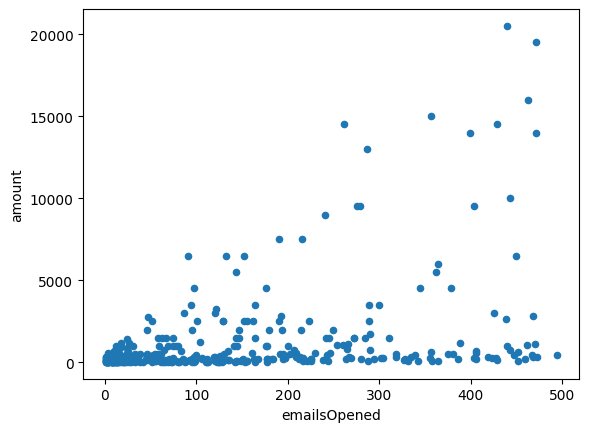

In [164]:
pd.merge(
    left = total_emails,
    right= total_doação,
    on = 'user', how = 'inner'   
).plot.scatter(
    y = 'amount', x = 'emailsOpened'
)

In [165]:
# verificando semenas nulas
emails[emails['emailsOpened'] < 1]

,emailsOpened,user,week


In [166]:
emails.loc[emails['user']==998]

,emailsOpened,user,week
25464,1.0,998.0,2017-12-04
25465,3.0,998.0,2017-12-11
25466,3.0,998.0,2017-12-18
25467,3.0,998.0,2018-01-01
25468,3.0,998.0,2018-01-08
25469,2.0,998.0,2018-01-15
25470,3.0,998.0,2018-01-22
25471,2.0,998.0,2018-01-29
25472,3.0,998.0,2018-02-05
25473,3.0,998.0,2018-02-12


In [167]:
# Verificando quandas
((max(emails.loc[emails['user']==998]['week']) - \
min(emails.loc[emails['user']==998]['week'])).days/7)

25.0

In [168]:
emails.loc[emails['user']==998]['week'].shape

(24,)

> Deveria ter mais 26 
> * SEMANA_FALTANTES = $\frac{(inicio -  final).dias}{7} + 1$,  "+1" é para contar a 1 semana

In [169]:
completo = pd.MultiIndex.from_product(
    (set(emails['week']), set(emails['user']))
)

In [170]:
completo[0:10]

MultiIndex([('2016-02-15',  1.0),
            ('2016-02-15',  3.0),
            ('2016-02-15',  5.0),
            ('2016-02-15',  6.0),
            ('2016-02-15',  9.0),
            ('2016-02-15', 10.0),
            ('2016-02-15', 14.0),
            ('2016-02-15', 16.0),
            ('2016-02-15', 20.0),
            ('2016-02-15', 21.0)],
           )

In [171]:
all_emails = emails.set_index(['week', 'user'])\
                   .reindex(completo, fill_value=0)\
                   .reset_index()

In [172]:
all_emails.head(2)

,level_0,level_1,emailsOpened
0,2016-02-15,1.0,3.0
1,2016-02-15,3.0,0.0


In [173]:
all_emails.columns = ['week', 'user', 'emailsOpened']

In [174]:
all_emails[all_emails['user']==998].sort_values('week')

,week,user,emailsOpened
29644,2015-02-09,998.0,0.0
78154,2015-02-16,998.0,0.0
23176,2015-02-23,998.0,0.0
3772,2015-03-02,998.0,0.0
47970,2015-03-09,998.0,0.0
...,...,...,...
14013,2018-04-30,998.0,3.0
59828,2018-05-07,998.0,3.0
74920,2018-05-14,998.0,3.0
59289,2018-05-21,998.0,3.0


In [175]:
ponto_de_conte =  emails\
                        .groupby(by=['user'])['week']\
                        .agg({'max','min'})\
                        .reset_index()

ponto_de_conte.head(2)

,user,max,min
0,1.0,2018-05-28,2015-06-29
1,3.0,2018-04-23,2018-03-05


In [176]:
for _, row in ponto_de_conte.iterrows():
    user = row['user']
    inicio = row['min']
    final  = row['max']

    all_emails.drop(
        index = (
            all_emails[
                (all_emails['user']==user) & 
                (all_emails['week'] < inicio)]
        ).index, inplace=True
    )
    all_emails.drop(
        index = (
            all_emails[
                (all_emails['user']==user) & 
                (all_emails['week'] > final)]
        ).index, inplace=True
    )

### Construindo uma sério temporal encontrada

In [177]:
donation['timestamp'] = pd.to_datetime(donation['timestamp'])

In [178]:
donation.set_index('timestamp', inplace=True)

In [181]:
agg_don = donation.groupby(by=['user'])\
                  .apply(
                      lambda df: df.amount.resample('W-MON').sum().dropna()
                  ).reset_index().reset_index()

C:\Users\mateu\AppData\Local\Temp\ipykernel_1904\1668767991.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [183]:
agg_don.head(10)

,index,user,timestamp,amount
0,0,0.0,2015-03-30,25.0
1,1,0.0,2015-04-06,0.0
2,2,0.0,2015-04-13,0.0
3,3,0.0,2015-04-20,0.0
4,4,0.0,2015-04-27,0.0
5,5,0.0,2015-05-04,0.0
6,6,0.0,2015-05-11,0.0
7,7,0.0,2015-05-18,0.0
8,8,0.0,2015-05-25,0.0
9,9,0.0,2015-06-01,0.0


In [184]:
merged = pd.DataFrame({'week':[],'emailsOpened':[], 'amount':[], 'user':[]}) 

for user, userMail in all_emails.groupby(by=['user']):
    userDonation = agg_don[agg_don['user']==user]

    userDonation.set_index('timestamp', inplace=True)

    userMail.set_index('week', inplace=True)

    userMail = all_emails[all_emails['user']==user]
    userMail.sort_values('week').set_index('week')

    df = pd.merge(
        userMail, userDonation, how='left',left_index=True, right_index=True
    )

    df.fillna(0)
    
    df['user'] = df.user_x
    merged = pd.concat([merged,df[['week', 'amount', 'user', 'emailsOpened']]])

C:\Users\mateu\AppData\Local\Temp\ipykernel_1904\4074007701.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged = pd.concat([merged,df[['week', 'amount', 'user', 'emailsOpened']]])


In [186]:
df = merged[merged['user']==998]
df['target'] = df.amount.shift(1)
df.fillna(0)

C:\Users\mateu\AppData\Local\Temp\ipykernel_1904\3107253792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df.amount.shift(1)


,week,emailsOpened,amount,user,target
1616,2018-03-19,2.0,0.0,998.0,0.0
14013,2018-04-30,3.0,0.0,998.0,0.0
15091,2017-12-11,3.0,0.0,998.0,0.0
15630,2018-01-08,3.0,0.0,998.0,0.0
16169,2018-03-12,3.0,0.0,998.0,0.0
18325,2018-04-16,3.0,0.0,998.0,0.0
19942,2018-01-22,3.0,0.0,998.0,0.0
29105,2018-01-15,2.0,0.0,998.0,0.0
30183,2017-12-25,0.0,0.0,998.0,0.0
30722,2018-03-05,2.0,0.0,998.0,0.0
